In [1]:
import os
import tensorflow as tf
from PIL import Image
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


three = ["number","letter"]
dict_all={'0': 0,'1': 1,'2': 2,'3': 3,'4': 4,'5': 5,'6': 6,'7': 7,'8': 8,'9': 9,
            'A': 10,'B': 11,'C': 12,'D': 13,'E': 14,'F': 15,'G': 16,'H': 17, 'J': 18,
            'K': 19,'L': 20,'M': 21,'N': 22,'P': 23,'Q': 24,'R': 25,'S': 26,
            'T': 27,'U': 28,'V': 29,'W': 30,'X': 31,'Y': 32,'Z': 33}
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

filename1 = os.path.join("./TFRecord/", "test.tfrecords")

img_number = 0
writer1 = tf.python_io.TFRecordWriter(filename1)
imgs = []
labes = []
for i in three:
    labels = os.listdir(i)
    for j in labels:
        every_label = dict_all[j]
        file_name = os.listdir(i + "/" + j)
        for k in file_name:
            img_number += 1
            a_image = Image.open(i + "/" + j + "/" + k).convert('L')
            
            change_image = a_image.resize((24,48), Image.ANTIALIAS)
            image_raw = np.array(change_image).reshape(48*24)
            imgs.append(image_raw)
            labes.append(every_label)
imgs = np.array(imgs)
labes = np.array(labes).reshape(len(labes), 1)
data = shuffle(np.hstack((labes, imgs)))

shu_label = data[:, 0]
shu_image = data[:, 1:]
print(shu_label.shape)
print(shu_image.shape)

for i in range(img_number):
    a_image = shu_image[i]
#     a_image = np.array(a_image.reshape(48,24))
    if i == 10:
        print(a_image.shape)
    image_raw = np.array(a_image).tostring()
    img_label = shu_label[i]
    
    
    example = tf.train.Example(features=tf.train.Features(feature={
            'label': _int64_feature(img_label),
            'image_raw': _bytes_feature(image_raw)
        }))
    
    
    writer1.write(example.SerializeToString())

writer1.close()
print("ok")

(4314,)
(4314, 1152)
(1152,)
ok


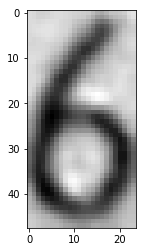

label: 6


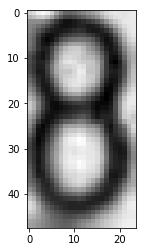

label: 8


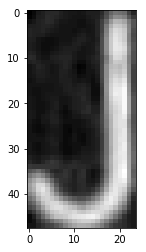

label: 18


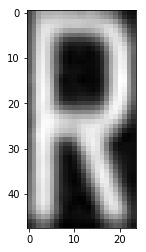

label: 25


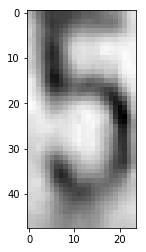

label: 5


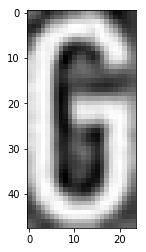

label: 16


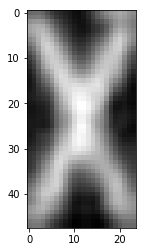

label: 31


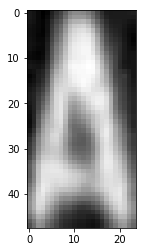

label: 10


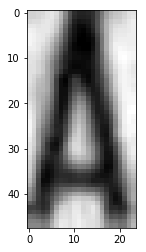

label: 10


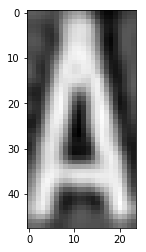

label: 10


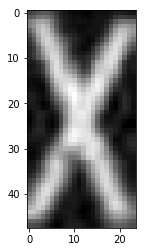

label: 31


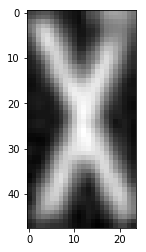

label: 31


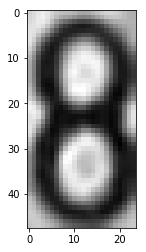

label: 8


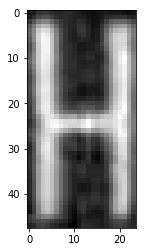

label: 17


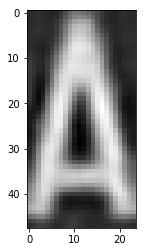

label: 10


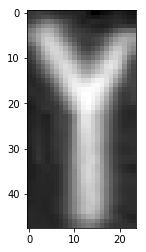

label: 32


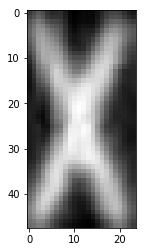

label: 31


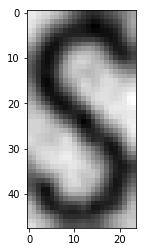

label: 26


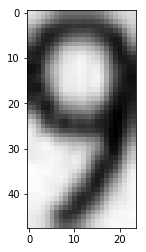

label: 9


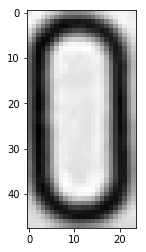

label: 0


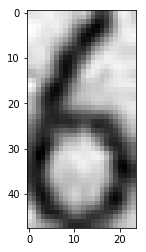

label: 6


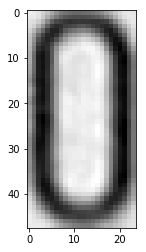

label: 0


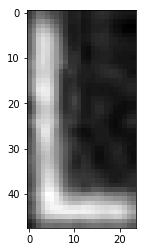

label: 20


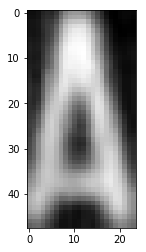

label: 10


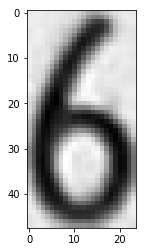

label: 6


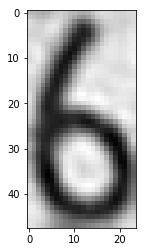

label: 6


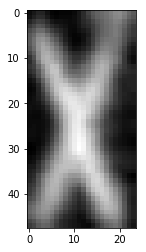

label: 31


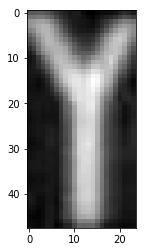

label: 32


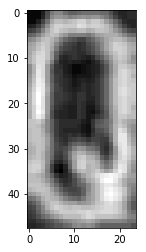

label: 24


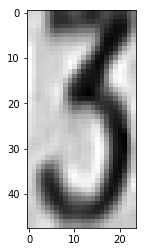

label: 3


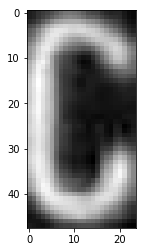

label: 12


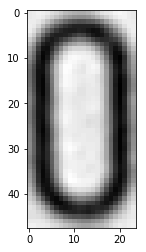

label: 0


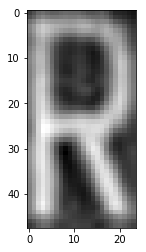

label: 25


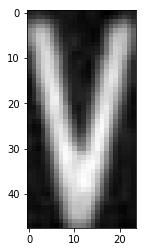

label: 29


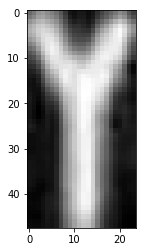

label: 32


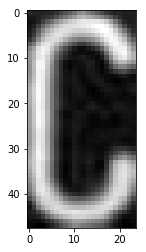

label: 12


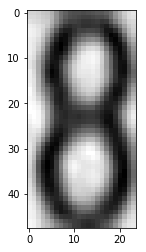

label: 8


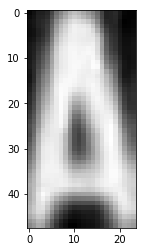

label: 10


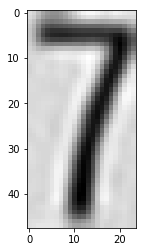

label: 7


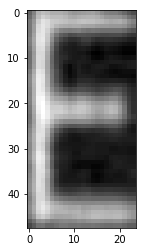

label: 14


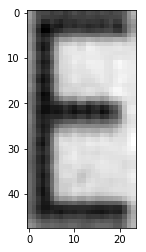

label: 14


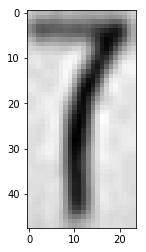

label: 7


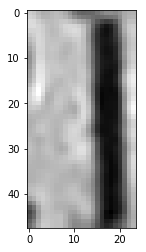

label: 1


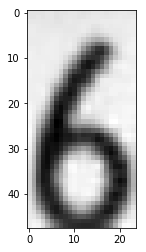

label: 6


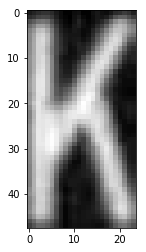

label: 19


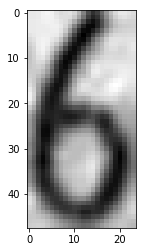

label: 6


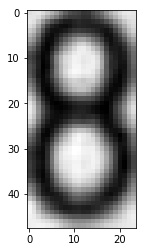

label: 8


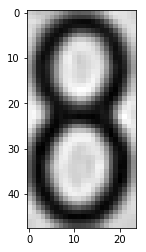

label: 8


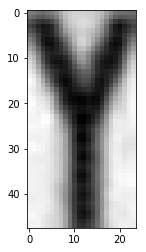

label: 32


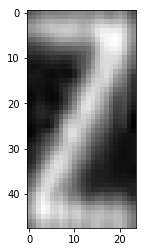

label: 33


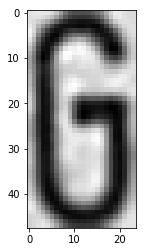

label: 16


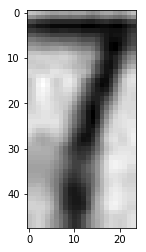

label: 7


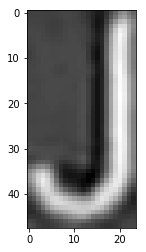

label: 18


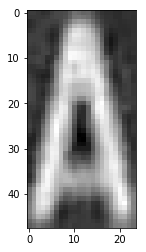

label: 10


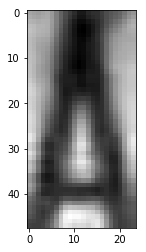

label: 10


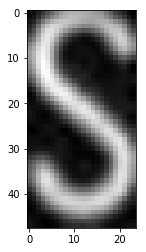

label: 26


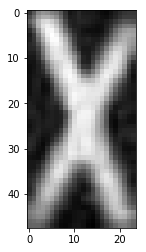

label: 31


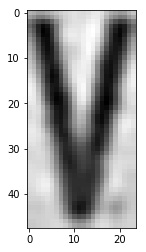

label: 29


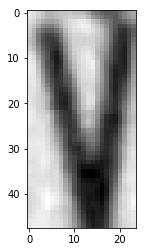

label: 29


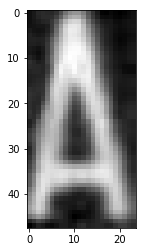

label: 10


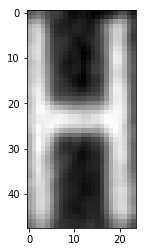

label: 17


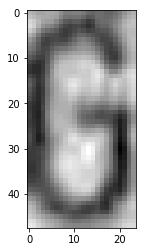

label: 16


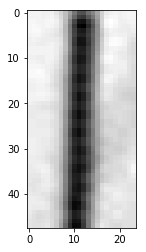

label: 1


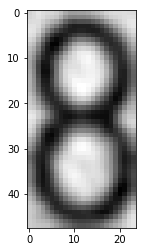

label: 8


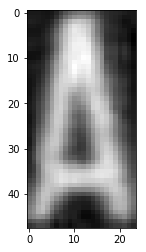

label: 10


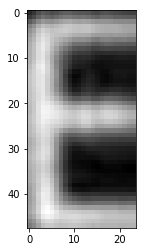

label: 14


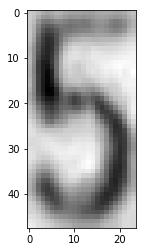

label: 5


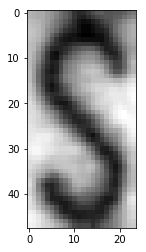

label: 26


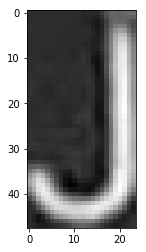

label: 18


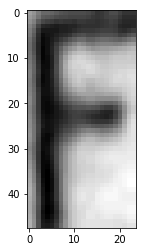

label: 15


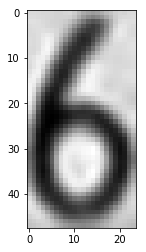

label: 6


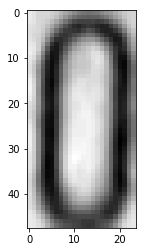

label: 0


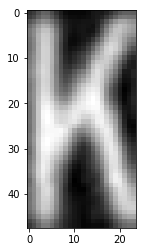

label: 19


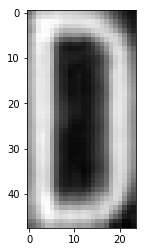

label: 13


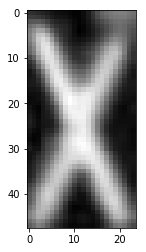

label: 31


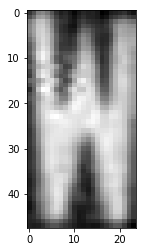

label: 30


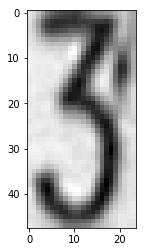

label: 3


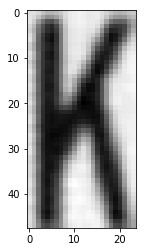

label: 19


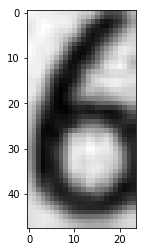

label: 6


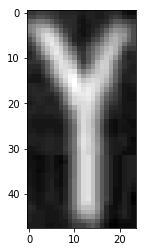

label: 32


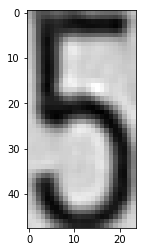

label: 5


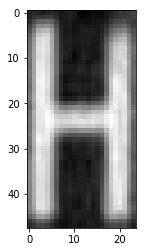

label: 17


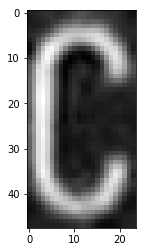

label: 12


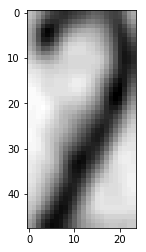

label: 2


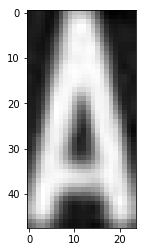

label: 10


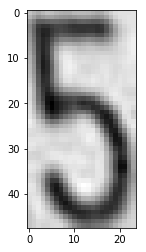

label: 5


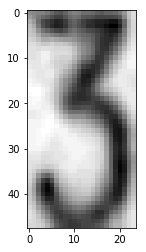

label: 3


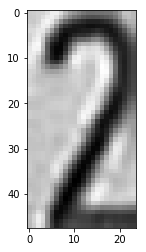

label: 2


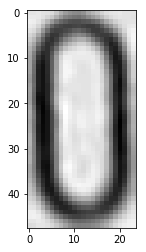

label: 0


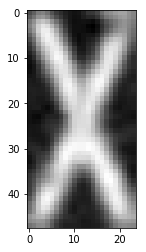

label: 31


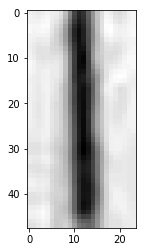

label: 1


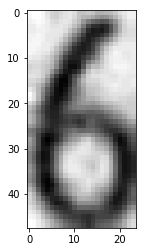

label: 6


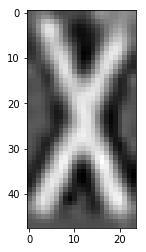

label: 31


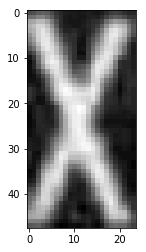

label: 31


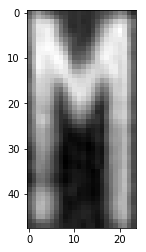

label: 21


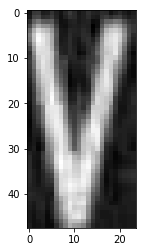

label: 29


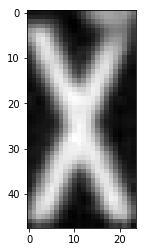

label: 31


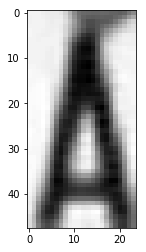

label: 10


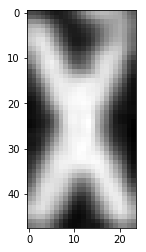

label: 31


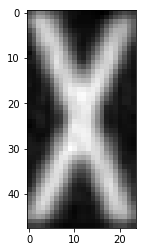

label: 31


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


reader = tf.TFRecordReader()

filename_queue = tf.train.string_input_producer(["./TFRecord/test.tfrecords"])

_, serialized_example = reader.read(filename_queue)

features = tf.parse_single_example(
        serialized_example,
        features={
        'image_raw': tf.FixedLenFeature([], tf.string),
        'label': tf.FixedLenFeature([], tf.int64)
    })
labels = tf.cast(features['label'], tf.int32)
images = tf.decode_raw(features['image_raw'], tf.int64)
# images = tf.reshape(images, shape=[48, 24])

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    for ii in range(100):
        img, lab = sess.run([images, labels])
        img = img.reshape(48,24)
#         print(img.shape)
        plt.imshow(img, cmap="gray")
        plt.show()
        print('label:',lab)
#         for kk in range(10):
            
#             plt.imshow(img[kk, :, :, 0], cmap='gray')
#             plt.show()
#             print('label: %d' %lab[kk])
        
    coord.request_stop()
    coord.join(threads)
